<a href="https://colab.research.google.com/github/crazymuse/DeepLearningOnCloud/blob/master/YOLO_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 1.10 MiB/s, done.
Resolving deltas: 100% (3921/3921), done.


In [0]:
!ls

0_img.png    240_img.png  400_img.png  550_img.png  70_img.png	 860_img.png
100_img.png  250_img.png  40_img.png   560_img.png  710_img.png  870_img.png
10_img.png   260_img.png  410_img.png  570_img.png  720_img.png  880_img.png
110_img.png  270_img.png  420_img.png  580_img.png  730_img.png  890_img.png
120_img.png  280_img.png  430_img.png  590_img.png  740_img.png  900_img.png
130_img.png  290_img.png  440_img.png  600_img.png  750_img.png  90_img.png
140_img.png  300_img.png  450_img.png  60_img.png   760_img.png  910_img.png
150_img.png  30_img.png   460_img.png  610_img.png  770_img.png  920_img.png
160_img.png  310_img.png  470_img.png  620_img.png  780_img.png  930_img.png
170_img.png  320_img.png  480_img.png  630_img.png  790_img.png  940_img.png
180_img.png  330_img.png  490_img.png  640_img.png  800_img.png  950_img.png
190_img.png  340_img.png  500_img.png  650_img.png  80_img.png	 960_img.png
200_img.png  350_img.png  50_img.png   660_img.png  810_img.png  970_img.png
20

In [0]:
cd darknet

/content/darknet


In [0]:
!ls

cfg	  include	LICENSE.gen   LICENSE.mit  python     src
data	  LICENSE	LICENSE.gpl   LICENSE.v1   README.md
examples  LICENSE.fuck	LICENSE.meta  Makefile	   scripts


In [0]:
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [0]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:947:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o


In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-05-22 21:43:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  28.5MB/s    in 8.6s    

2019-05-22 21:43:43 (27.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
!pip install opencv-python

In [0]:
!pip list

Package                  Version              
------------------------ ---------------------
absl-py                  0.7.1                
alabaster                0.7.12               
albumentations           0.1.12               
altair                   3.0.1                
astor                    0.7.1                
astropy                  3.0.5                
atari-py                 0.1.7                
atomicwrites             1.3.0                
attrs                    19.1.0               
audioread                2.1.7                
autograd                 1.2                  
Babel                    2.6.0                
backcall                 0.1.0                
backports.tempfile       1.0                  
backports.weakref        1.0.post1            
beautifulsoup4           4.6.3                
bleach                   3.1.0                
bokeh                    1.0.4                
boto                     2.49.0               
boto3        

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


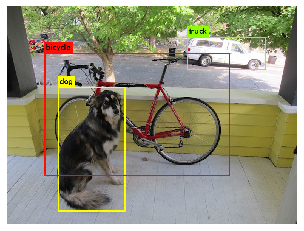

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [0]:
!pip list

Package                  Version              
------------------------ ---------------------
absl-py                  0.7.1                
alabaster                0.7.12               
albumentations           0.1.12               
altair                   3.0.1                
astor                    0.7.1                
astropy                  3.0.5                
atari-py                 0.1.7                
atomicwrites             1.3.0                
attrs                    19.1.0               
audioread                2.1.7                
autograd                 1.2                  
Babel                    2.6.0                
backcall                 0.1.0                
backports.tempfile       1.0                  
backports.weakref        1.0.post1            
beautifulsoup4           4.6.3                
bleach                   3.1.0                
bokeh                    1.0.4                
boto                     2.49.0               
boto3        

In [0]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.2 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.2 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [0]:
!ls /usr/local

bin  cuda  cuda-10.0  etc  games  include  lib	man  sbin  share  src  xgboost
